### **Name: Samarth Garg**
### **Roll No: 2020IMT085**
### **Course: Data Mining Lab (Minor Exam)**

### Loading libraries and data

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns


### Loading Data

In [93]:
df = pd.read_csv("./data/archive/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Since the dataset is balanced, we can use use random split instead of stratified split

In [94]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [95]:
scaler = StandardScaler()
age = scaler.fit_transform(df[['age']])
trestbps = scaler.fit_transform(df[['trestbps']])
chol = scaler.fit_transform(df[['chol']])
thalach = scaler.fit_transform(df[['thalach']])

df_std = pd.DataFrame()
df_std['age'] = age.reshape(-1)
df_std['trestbps'] = trestbps.reshape(-1)
df_std['chol'] = chol.reshape(-1)
df_std['thalach'] = thalach.reshape(-1)
df_std['target'] = df['target']
df_std[['sex', 'cp',  'fbs',	'restecg',	'exang',	'oldpeak',	'slope',	'ca',	'thal']] = df[['sex', 'cp',  'fbs',	'restecg',	'exang',	'oldpeak',	'slope',	'ca',	'thal']]

df_std.head()

,age,trestbps,chol,thalach,target,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal
0,-0.268437,-0.377636,-0.659332,0.821321,0,1,0,0,1,0,1.0,2,2,3
1,-0.158157,0.479107,-0.833861,0.255968,0,1,0,1,0,1,3.1,0,0,3
2,1.716595,0.764688,-1.396233,-1.048692,0,1,0,0,1,1,2.6,0,0,3
3,0.724079,0.936037,-0.833861,0.516900,0,1,0,0,1,0,0.0,2,1,3
4,0.834359,0.364875,0.930822,-1.874977,0,0,0,1,1,0,1.9,1,3,2


* Heatmap is poorly correlated

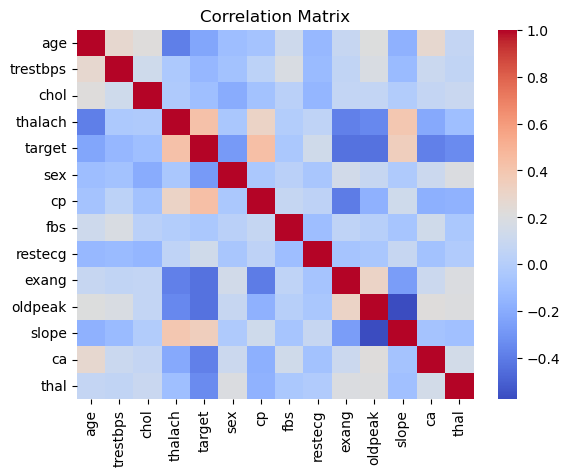

In [96]:
sns.heatmap(df_std.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Splitting the data randomly for training and testing

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_std.drop('target', axis=1), df_std['target'], test_size=0.2, random_state=42)
main_train_X, main_test_X, main_test_y, main_test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


### Applying the Decision Tree Classifier, fitting it, predicting it and printing the accuracy score

In [98]:
'''
Perform classification using the decision tree model. Print the F-score, accuracy,
and confusion matrix.
'''
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}, Test Precision: {test_precision}")
print(f'Train Recall: {train_recall}, Test Recall: {test_recall}')
print(f'Train F1: {train_f1}, Test F1: {test_f1}')

Train Accuracy: 1.0, Test Accuracy: 0.9853658536585366
Train Precision: 1.0, Test Precision: 1.0
Train Recall: 1.0, Test Recall: 0.970873786407767
Train F1: 1.0, Test F1: 0.9852216748768473


### Plot the Confusion Matrix

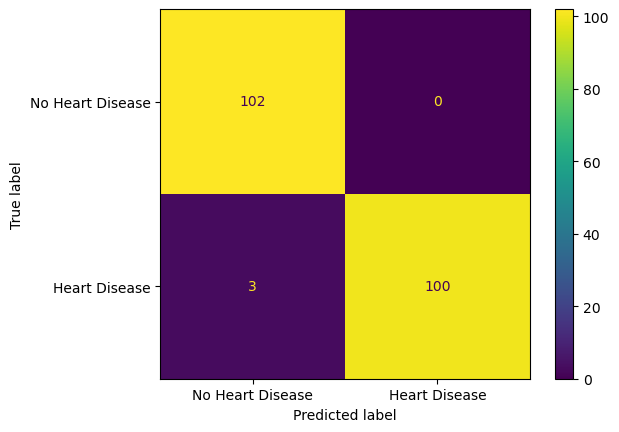

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
dist = ConfusionMatrixDisplay(cm, display_labels=['No Heart Disease', 'Heart Disease'])
dist.plot()

In [100]:
'''
Delete a feature attribute, one at a time, and print the F-score for both the training
and testing data.
'''

for i in range(X_train.shape[1]):
    X_train_drop = X_train.drop(X_train.columns[i], axis=1)
    X_test_drop = X_test.drop(X_test.columns[i], axis=1)

    clf = DecisionTreeClassifier(random_state=42, max_depth=3)
    clf.fit(X_train_drop, y_train)

    y_pred_train = clf.predict(X_train_drop)
    y_pred_test = clf.predict(X_test_drop)

    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    print(f'F1 Score for {X_train.columns[i]}: Train: {train_f1}, Test: {test_f1}')

F1 Score for age: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for trestbps: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for chol: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for thalach: Train: 0.8669623059866962, Test: 0.7929515418502202
F1 Score for sex: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for cp: Train: 0.8571428571428573, Test: 0.8207547169811321
F1 Score for fbs: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for restecg: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for exang: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for oldpeak: Train: 0.8645161290322582, Test: 0.8138528138528138
F1 Score for slope: Train: 0.8656387665198239, Test: 0.8017621145374451
F1 Score for ca: Train: 0.8366701791359326, Test: 0.810126582278481
F1 Score for thal: Train: 0.8635346756152126, Test: 0.7853881278538813


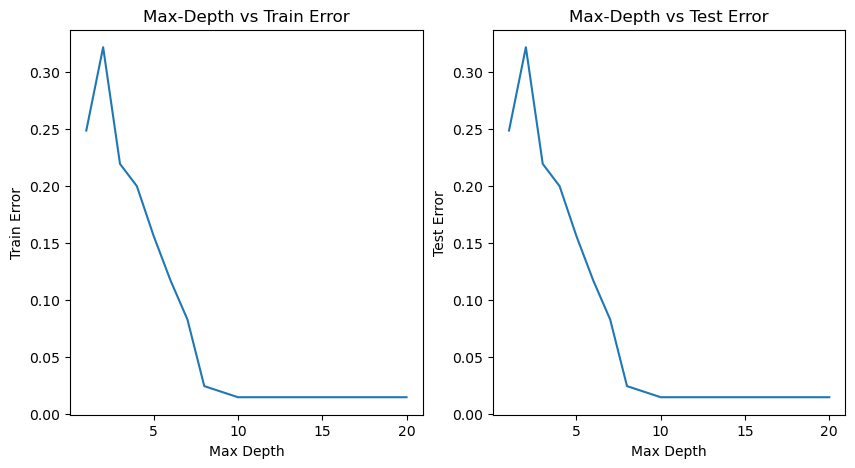

In [101]:
'''
Plot the training and testing error for different maximum allowable depths of the
tree.
'''

train_errors, max_depths = [], []
for i in range(20):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i+1)
    clf.fit(X_train, y_train)

    error = 1 - clf.score(X_test, y_test)
    train_errors.append(error)
    max_depths.append(i+1)

test_errors, max_depths = [], []
for i in range(20):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i+1)
    clf.fit(X_train, y_train)

    error = 1 - clf.score(X_test, y_test)
    test_errors.append(error)
    max_depths.append(i+1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(max_depths, train_errors)
ax2.plot(max_depths, test_errors)
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Train Error')
ax1.set_title('Max-Depth vs Train Error')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Test Error')
ax2.set_title('Max-Depth vs Test Error')
plt.show()


In [102]:
'''For every attribute, print the data with the largest or smallest attribute value.'''

table = pd.DataFrame()
table['Attribute'] = X_train.columns
table['Max'] = [main_train_X[X_train.columns[i]].max() for i in range(main_train_X.shape[1])]
table['Min'] = [main_train_X[X_train.columns[i]].min() for i in range(main_train_X.shape[1])]
table

,Attribute,Max,Min
0,age,77.0,29.0
1,trestbps,200.0,94.0
2,chol,564.0,126.0
3,thalach,202.0,71.0
4,sex,1.0,0.0
5,cp,3.0,0.0
6,fbs,1.0,0.0
7,restecg,2.0,0.0
8,exang,1.0,0.0
9,oldpeak,6.2,0.0


* Plotting the confusion matrix after deleting 5 % of the correctly classified data and we can observe that the accuracy has decreased

In [103]:
'''
Delete 5% of the data where the classifier trained from (i) is the ‘most confident’
for every label. Repeat training with the reduced data. Print the F-score, accuracy,
and confusion matrix.
'''

X_train_correct_indices = X_train[y_train == y_pred_train].index

del_ratio = 0.05
del_indices = X_train_correct_indices[:int(len(X_train_correct_indices) * del_ratio)]

X_train = X_train.drop(del_indices)
y_train = y_train.drop(del_indices)

clf = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}, Test Precision: {test_precision}")
print(f'Train Recall: {train_recall}, Test Recall: {test_recall}')
print(f'Train F1: {train_f1}, Test F1: {test_f1}')

Train Accuracy: 1.0, Test Accuracy: 0.975609756097561
Train Precision: 1.0, Test Precision: 1.0
Train Recall: 1.0, Test Recall: 0.9514563106796117
Train F1: 1.0, Test F1: 0.9751243781094527


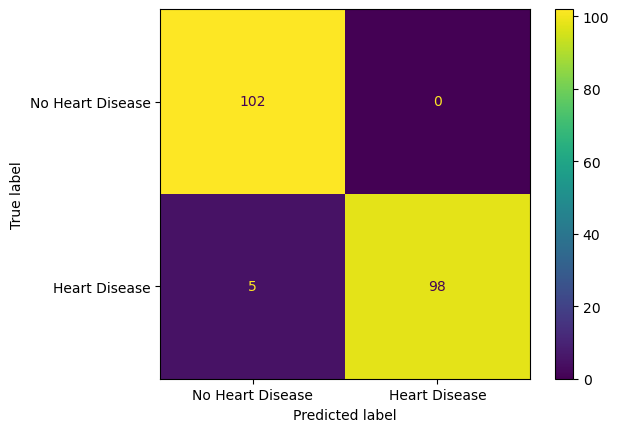

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
dist = ConfusionMatrixDisplay(cm, display_labels=['No Heart Disease', 'Heart Disease'])
dist.plot()